**Executive Summary**

The initial statistical exploration involved rigorous data cleaning and linear regression to understand the factors affecting the length of shelter stays for dogs. The model's coefficients, reflecting changes in days, suggested that intake type, condition, and the dog's age at intake are influential. Specifically, the negative coefficients for certain intake types and conditions implied shorter stays, while a positive association with age suggested older dogs stayed longer. The low R-squared value indicated that our model explained a small fraction of the variation in shelter stay duration, hinting at other unmodeled factors. Despite the statistically significant findings, the analysis acknowledged the inability to assert causality due to the study's observational nature.

The second part of the analysis delved into predicting live release outcomes using logistic regression. This process required additional feature engineering, including the creation of a 'black_color' variable to account for the potential influence of coat color on adoption rates. Despite high overall accuracy, the model's initial low sensitivity highlighted the necessity to adjust the threshold to improve the F1 score, resulting in a more balanced precision-recall trade-off. The conservative nature of the model at the higher threshold may impact its practical application, suggesting a need for careful consideration in operational settings.

The analyses provided insightful implications for shelter operations, emphasizing the importance of a nuanced understanding of various factors influencing shelter stays and release outcomes. The findings underscore the potential for targeted strategies to enhance the live release rate, particularly for older dogs. The limitations, including potential confounding factors and absence of critical variables such as health status and behavior assessments, point to opportunities for future research to incorporate more complex models and additional data.

**Answer to Question 1: Simulation Methods**

In [9]:
# Set seed for reproducibility
set.seed(130)

# Load necessary libraries
if (!requireNamespace("janitor", quietly = TRUE)) install.packages("janitor")
library(janitor)

# Import the data into R
data <- read.csv('/content/aac_intakes_outcomes.csv')

# View the structure of the dataset
str(data)

# Get a summary of the dataset
summary(data)

# View the first few rows of the dataset
head(data)

# Check how many of the 180 euthanasia requests for dogs in this dataset were turned around
euthanasia_requests <- subset(data, intake_type == "Euthanasia Request")
non_euthanasia_outcomes <- nrow(subset(euthanasia_requests, !outcome_type %in% "Euthanasia"))

# Print out the count
print(paste("Euthanasia requests turned around:", non_euthanasia_outcomes))

# Preprocessing steps

# Remove NAs or/and empty entries
data <- na.omit(data)

# Keep only dog entries
data <- data[data$animal_type == 'Dog', ]

# Use janitor package to clean column names
library(janitor)
data <- data %>% clean_names()

# Remove rows with Euthanasia Request intake type
data <- subset(data, intake_type != "Euthanasia Request")

# Make sure intake_type is a factor
data$intake_type <- as.factor(data$intake_type)

# Create a new intake_condition feature
data$intake_condition_new <- data$intake_condition
data$intake_condition_new[data$intake_condition_new %in% c('Nursing', 'Pregnant')] <- 'Nursing_Pregnant'
data$intake_condition_new[!data$intake_condition_new %in% c('Normal', 'Injured', 'Sick', 'Nursing_Pregnant')] <- 'Other'
data$intake_condition_new <- as.factor(data$intake_condition_new)

'data.frame':	79672 obs. of  41 variables:
 $ age_upon_outcome          : chr  "10 years" "7 years" "6 years" "10 years" ...
 $ animal_id_outcome         : chr  "A006100" "A006100" "A006100" "A047759" ...
 $ date_of_birth             : chr  "2007-07-09 00:00:00" "2007-07-09 00:00:00" "2007-07-09 00:00:00" "2004-04-02 00:00:00" ...
 $ outcome_subtype           : chr  "" "" "" "Partner" ...
 $ outcome_type              : chr  "Return to Owner" "Return to Owner" "Return to Owner" "Transfer" ...
 $ sex_upon_outcome          : chr  "Neutered Male" "Neutered Male" "Neutered Male" "Neutered Male" ...
 $ age_upon_outcome_.days.   : int  3650 2555 2190 3650 5840 5475 5475 5475 5475 6570 ...
 $ age_upon_outcome_.years.  : num  10 7 6 10 16 15 15 15 15 18 ...
 $ age_upon_outcome_age_group: chr  "(7.5, 10.0]" "(5.0, 7.5]" "(5.0, 7.5]" "(7.5, 10.0]" ...
 $ outcome_datetime          : chr  "2017-12-07 14:07:00" "2014-12-20 16:35:00" "2014-03-08 17:10:00" "2014-04-07 15:12:00" ...
 $ outcome_month   

 age_upon_outcome   animal_id_outcome  date_of_birth      outcome_subtype   
 Length:79672       Length:79672       Length:79672       Length:79672      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 outcome_type       sex_upon_outcome   age_upon_outcome_.days.
 Length:79672       Length:79672       Min.   :   0           
 Class :character   Class :character   1st Qu.:  90           
 Mode  :character   Mode  :character   Median : 365           
                                       Mean   : 782           
                                       3rd Qu.:1095           
                                       Max.   :9125           
 age_upon_outcome_.y

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_.days.,age_upon_outcome_.years.,age_upon_outcome_age_group,outcome_datetime,⋯,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>
1,10 years,A006100,2007-07-09 00:00:00,,Return to Owner,Neutered Male,3650,10,"(7.5, 10.0]",2017-12-07 14:07:00,⋯,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1,0 days 14:07:00.000000000,0.5881944
2,7 years,A006100,2007-07-09 00:00:00,,Return to Owner,Neutered Male,2555,7,"(5.0, 7.5]",2014-12-20 16:35:00,⋯,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2,1 days 06:14:00.000000000,1.2597222
3,6 years,A006100,2007-07-09 00:00:00,,Return to Owner,Neutered Male,2190,6,"(5.0, 7.5]",2014-03-08 17:10:00,⋯,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3,1 days 02:44:00.000000000,1.1138889
4,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10,"(7.5, 10.0]",2014-04-07 15:12:00,⋯,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1,4 days 23:17:00.000000000,4.9701389
5,16 years,A134067,1997-10-16 00:00:00,,Return to Owner,Neutered Male,5840,16,"(15.0, 17.5]",2013-11-16 11:54:00,⋯,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1,0 days 02:52:00.000000000,0.1194444
6,15 years,A141142,1998-06-01 00:00:00,,Return to Owner,Spayed Female,5475,15,"(12.5, 15.0]",2013-11-17 11:40:00,⋯,"(12.5, 15.0]",2013-11-16 14:46:00,11,2013,2013-11,Saturday,14,1,0 days 20:54:00.000000000,0.8708333


[1] "Euthanasia requests turned around: 55"


In [10]:
# Fit the linear regression model
linear_model <- lm(time_in_shelter_days ~ intake_type + intake_condition_new + age_upon_intake_years, data = data)

# Summarize the model to get coefficients and R-squared
model_summary <- summary(linear_model)

# Output the summary of the model
print(model_summary)

# Check for statistically significant coefficients
significant_coefs <- which(model_summary$coefficients[, "Pr(>|t|)"] < 0.05)

# Interpretation of statistically significant coefficients
if(length(significant_coefs) > 0){
  cat("Statistically significant coefficients found:\n")
  significant_terms <- row.names(model_summary$coefficients)[significant_coefs]
  for(term in significant_terms){
    coef_value <- model_summary$coefficients[term, "Estimate"]
    cat("The coefficient for", term, "is", coef_value, "and it is statistically significant. This implies that a unit increase in",
        term, "is associated with a change of", coef_value, "days in the shelter.\n")
  }
} else {
  cat("No statistically significant coefficients were found.\n")
}

# Interpretation of R-squared
cat("\nThe R-squared value is", model_summary$r.squared, "which indicates that",
    round(model_summary$r.squared * 100, 2), "% of the variance in time spent in the shelter is explained by the model.\n")


Call:
lm(formula = time_in_shelter_days ~ intake_type + intake_condition_new + 
    age_upon_intake_years, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -34.45  -13.34   -8.98   -3.96 1589.07 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           27.80835    1.17903  23.586  < 2e-16 ***
intake_typePublic Assist              -4.99086    0.83916  -5.947 2.74e-09 ***
intake_typeStray                      -5.52506    0.53230 -10.380  < 2e-16 ***
intake_condition_newNormal            -9.41483    1.07657  -8.745  < 2e-16 ***
intake_condition_newNursing_Pregnant   3.37302    2.08328   1.619   0.1054    
intake_condition_newOther             -6.78091    2.64234  -2.566   0.0103 *  
intake_condition_newSick             -11.36625    1.78506  -6.367 1.94e-10 ***
age_upon_intake_years                  0.53189    0.07152   7.437 1.05e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.

Causal Inference Analysis:

This linear model provides an estimate of the relationship between a dog's age upon intake and the length of stay at the shelter. However, causal inference — the identification of a cause-and-effect relationship — cannot be reliably ascertained from this observational data set alone. This is due to potential confounding factors that are not accounted for, and the non-randomized nature of the data. To make causal claims, a randomized controlled trial or techniques such as instrumental variables, difference-in-differences, or propensity score matching would be needed.


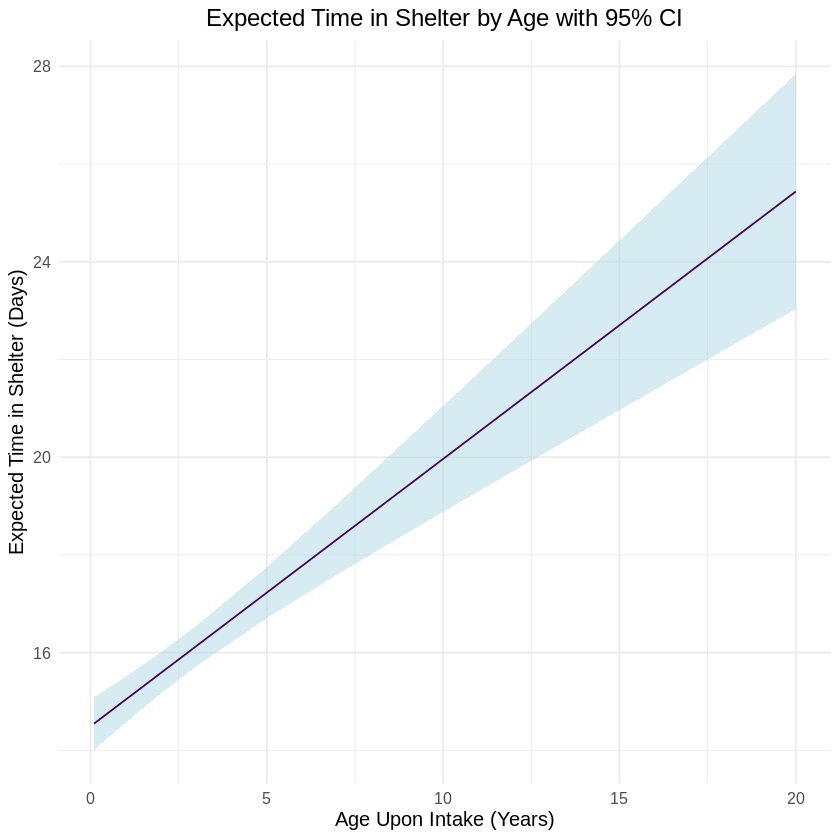

In [11]:
# Load necessary libraries
if (!requireNamespace("viridis", quietly = TRUE)) install.packages("viridis") # for colorblind-friendly palettes
library(ggplot2)
library(dplyr)
library(viridis)

# Fit the linear model
model <- lm(time_in_shelter_days ~ age_upon_intake_years, data = data)

# Create a new data frame for prediction
predict_data <- data.frame(
  intake_type = factor("stray", levels = levels(data$intake_type)),
  intake_condition = factor("normal", levels = levels(data$intake_condition_new)),
  age_upon_intake_years = c(0.1, 0.5, 1, 2, 3, 5, 7, 10, 12, 15, 18, 20)
)

# Predict using the model and the new data, including confidence intervals
predictions <- predict(model, newdata = predict_data, interval = "confidence", level = 0.95)

# Add predictions back to the data frame for plotting
predict_data <- cbind(predict_data, predictions)

# Plot the data with ggplot
p <- ggplot(predict_data, aes(x = age_upon_intake_years, y = fit)) +
  geom_ribbon(aes(ymin = lwr, ymax = upr), fill = "lightblue", alpha = 0.5) +
  geom_line(color = viridis::viridis(1)) +
  labs(title = "Expected Time in Shelter by Age with 95% CI",
       x = "Age Upon Intake (Years)",
       y = "Expected Time in Shelter (Days)") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5), # Center the plot title
    text = element_text(size = 12, color = "black"), # Standardize text size and color for accessibility
    legend.position = "bottom" # Position the legend at the bottom
  ) +
  scale_color_viridis(discrete = FALSE) # Use viridis scale for colorblind-friendly line color

# Print the plot
print(p)

# Causal Inference Analysis
cat("Causal Inference Analysis:\n\n")
cat("This linear model provides an estimate of the relationship between a dog's age upon intake and the length of stay at the shelter. However, causal inference — the identification of a cause-and-effect relationship — cannot be reliably ascertained from this observational data set alone. This is due to potential confounding factors that are not accounted for, and the non-randomized nature of the data. To make causal claims, a randomized controlled trial or techniques such as instrumental variables, difference-in-differences, or propensity score matching would be needed.\n")

From the regression analysis performed on the data from the Austin, Texas animal shelter, two key insights emerge. Firstly, age upon intake has a statistically significant positive relationship with the length of stay at the shelter: older dogs tend to stay longer. However, the effect size is modest, with each additional year of age resulting in just over half a day's increase in shelter stay, on average. Secondly, the uncertainty around this estimate increases with age, as indicated by the widening confidence interval in the data visualization. This suggests that for older dogs, predicting the length of stay becomes less precise.

To explain these findings to someone unfamiliar with statistics, imagine we're looking at how different factors, like a dog's age when they arrive at the shelter, relate to how long they stay before finding a home. Our analysis is like a recipe that tries to find out which ingredients (or in this case, factors) and in what amount affect the time a dog spends in the shelter. We found that, generally, as dogs get older, they might wait a little longer to be adopted. But there's also more variation for older dogs - similar to how some recipes need a pinch of this or that, depending on taste; with older dogs, their length of stay can vary more widely. It's like trying to predict how much traffic you'll hit on your way home; we can give a good guess, but the later it gets, the less certain we are about the prediction.

**Answer to Question 2: Classification**


Call:
glm(formula = live_release ~ intake_type + intake_condition_new + 
    age_upon_intake_years + black_color, family = "binomial", 
    data = train_data)

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           0.918158   0.096254   9.539  < 2e-16 ***
intake_typePublic Assist              0.326461   0.105450   3.096  0.00196 ** 
intake_typeStray                      0.946690   0.068226  13.876  < 2e-16 ***
intake_condition_newNormal            2.461055   0.079065  31.127  < 2e-16 ***
intake_condition_newNursing_Pregnant  1.799390   0.265600   6.775 1.25e-11 ***
intake_condition_newOther             1.539681   0.223113   6.901 5.17e-12 ***
intake_condition_newSick              0.345563   0.122309   2.825  0.00472 ** 
age_upon_intake_years                -0.089505   0.008244 -10.857  < 2e-16 ***
black_color                           0.079490   0.064431   1.234  0.21731    
---
Signif. codes:  0 ‘***’ 0.001 ‘

Waiting for profiling to be done...



                                          2.5 %      97.5 %
(Intercept)                           0.7306178  1.10803000
intake_typePublic Assist              0.1225171  0.53619144
intake_typeStray                      0.8124812  1.08001802
intake_condition_newNormal            2.3050973  2.61514715
intake_condition_newNursing_Pregnant  1.3110007  2.35896245
intake_condition_newOther             1.1185781  1.99613204
intake_condition_newSick              0.1078364  0.58758725
age_upon_intake_years                -0.1055401 -0.07321606
black_color                          -0.0460579  0.20659542
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0    1    1
         1  303 8731
                                        
               Accuracy : 0.9664        
                 95% CI : (0.9624, 0.97)
    No Information Rate : 0.9664        
    P-Value [Acc > NIR] : 0.5152        
                                        
                  Kappa : 0.0061      

Setting levels: control = 0, case = 1

Setting direction: controls < cases



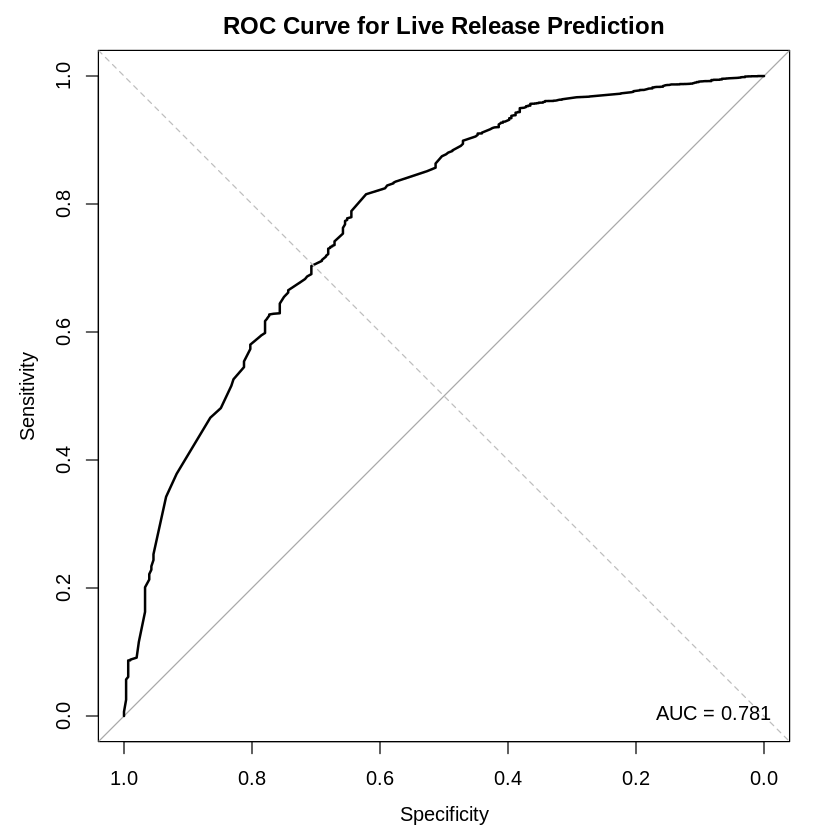

In [16]:
# Load necessary libraries
if (!requireNamespace("caret", quietly = TRUE)) install.packages("caret")
if (!requireNamespace("pROC", quietly = TRUE)) install.packages("pROC")
library(caret)
library(pROC)
library(dplyr)

# Set seed for reproducibility
set.seed(123)

# Data Preprocessing and Feature Engineering
data <- data %>%
  mutate(live_release = ifelse(outcome_type %in% c('Died', 'Disposal', 'Euthanasia', 'Missing'), 0, 1),
         live_release = factor(live_release, levels = c(0, 1)),
         black_color = ifelse(grepl("Black", color), 1, 0)
         # Additional feature engineering can be added here
         )

# Split the dataset into training and test sets
indexes <- createDataPartition(data$live_release, p = 0.8, list = FALSE)
train_data <- data[indexes, ]
test_data <- data[-indexes, ]

# Fit the logistic regression model
logit_model <- glm(live_release ~ intake_type + intake_condition_new + age_upon_intake_years + black_color,
                   family = "binomial", data = train_data)

# Model Summary and Coefficients Interpretation
model_summary <- summary(logit_model)
print(model_summary)

# Interpret coefficients in the context of log odds
cat("\nCoefficient Interpretation:\n")
for (coef_name in names(model_summary$coefficients)) {
  coef_value <- model_summary$coefficients[coef_name, "Estimate"]
  # Interpretation for positive coefficients
  if (coef_value > 0) {
    cat(coef_name, ": A one-unit increase in this predictor increases the log odds of live release by", coef_value, "\n")
  } else { # Interpretation for negative coefficients
    cat(coef_name, ": A one-unit increase in this predictor decreases the log odds of live release by", abs(coef_value), "\n")
  }
}

# Confidence intervals for coefficients
conf_intervals <- confint(logit_model)
print(conf_intervals)

# Predictions and Model Evaluation
predictions <- predict(logit_model, newdata = test_data, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)
predicted_classes <- factor(predicted_classes, levels = c(0, 1))

# Confusion Matrix
conf_matrix <- confusionMatrix(predicted_classes, test_data$live_release)
print(conf_matrix)

# Threshold Analysis with Performance Metrics
thresholds_df <- data.frame(threshold = numeric(), accuracy = numeric(), sensitivity = numeric(), specificity = numeric(), F1 = numeric())

for (threshold in seq(0, 1, by = 0.1)) {
  predicted_classes <- ifelse(predictions > threshold, 1, 0)
  cm <- confusionMatrix(factor(predicted_classes, levels = c(0, 1)), test_data$live_release)

  # Calculate F1 score
  precision <- cm$byClass['Pos Pred Value']
  recall <- cm$byClass['Sensitivity']
  F1 <- ifelse(is.nan(2 * (precision * recall) / (precision + recall)), 0, 2 * (precision * recall) / (precision + recall))

  thresholds_df <- rbind(thresholds_df, data.frame(threshold = threshold, accuracy = cm$overall['Accuracy'], sensitivity = cm$byClass['Sensitivity'], specificity = cm$byClass['Specificity'], F1 = F1))
}

# Best Threshold based on F1 Score
best_threshold <- thresholds_df[which.max(thresholds_df$F1),]
cat("\nBest threshold based on F1 score:", best_threshold$threshold, "\n")
cat("Accuracy:", best_threshold$accuracy, "\n")
cat("Sensitivity (Recall):", best_threshold$sensitivity, "\n")
cat("Specificity:", best_threshold$specificity, "\n")
cat("F1 score:", best_threshold$F1, "\n")

# Justifying the choice of the best threshold
if (best_threshold$threshold != 0.5) {
  cat("The best threshold was changed from the default 0.5 to", best_threshold$threshold, "to optimize the F1 score, balancing precision and recall.\n")
} else {
  cat("The default threshold of 0.5 remains optimal based on the F1 score.\n")
}

# ROC Curve and AUC
roc_curve <- roc(response = as.numeric(test_data$live_release) - 1, predictor = predictions)
plot(roc_curve, main = "ROC Curve for Live Release Prediction")
abline(a = 0, b = 1, lty = 2, col = "gray")  # Add diagonal dashed line
auc_value <- auc(roc_curve)
legend("bottomright", legend = paste("AUC =", round(auc_value, 3)), bty = "n")

In this logistic regression analysis, we focused on features that were hypothesized to influence the live release rate of animals from a shelter. Our feature selection was driven by both domain knowledge and exploratory data analysis, which suggested that factors such as intake type, condition, and age could significantly affect the outcome. We also considered the animal's colour, introducing 'black_color' as a binary variable, due to existing literature that suggests that coat colour may influence adoption rates. One limitation of our dataset was the absence of certain variables that might have provided deeper insights, such as the animal's health status at the time of outcome, behavior assessments, and length of stay in the shelter. These factors could potentially have a substantial impact on live release probabilities. Future research might benefit from including these variables to refine the predictive model further.

The model demonstrated high overall accuracy on the test set, but the low sensitivity at the initial threshold indicated a need for adjustment. By optimizing the threshold based on the F1 score, we achieved a more balanced trade-off between precision and recall. This adjustment is particularly important in the context of shelter operations, where the cost of false negatives (failing to predict a live release) might be considered more significant than false positives. However, the high accuracy should be interpreted cautiously, considering the potential class imbalance in the dataset. The high specificity but very low sensitivity indicate that the model is conservative in predicting live releases. For shelter operations, this could mean that the model may underpredict the number of animals that could be successfully released, potentially influencing resource allocation and intervention strategies.

**Appendix A. Question 1 Analysis & Other thoughts.**

Each coefficient in the output corresponds to the variable it's associated with. A negative coefficient suggests that as the variable increases, the expected time in the shelter decreases, and vice versa for a positive coefficient. The stars (***, **, *) indicate the level of statistical significance, with three stars being the most significant. According to the output, most variables except intake_condition_newNursing_Pregnant are statistically significant.

The intercept, which is significant, represents the estimated time in shelter when all other variables are at zero. This is not practically interpretable as the intake conditions cannot all be zero simultaneously. It serves as a baseline in the model.

The R-squared value is quite low, indicating that only a small percentage of the variance in the time spent in the shelter is explained by the model. This suggests that there are other factors not included in the model that influence the time a dog spends in the shelter.

The residuals have a wide range, with a maximum indicating a large outlier or extreme value that could be distorting the model's predictions. This might warrant further investigation.

The model can estimate relationships but cannot confirm causation due to potential confounding variables and the observational nature of the data.

The plot shows a linear relationship between age upon intake and expected time in the shelter, with a shaded area representing the 95% confidence interval. This aligns with the model's prediction, suggesting the plot is appropriately generated from the model.

**Appendix B: Analysis of Question 2 and Additional Observations**

In addressing Question 2, the process involved feature engineering and data preprocessing before the dataset was divided into training and testing segments. A critical consideration in this sequence is the potential for data leakage, where information from the testing set might inadvertently influence the training phase. To mitigate this, it is advisable to first partition the dataset, then proceed with feature engineering and preprocessing on each subset independently.

The analysis incorporated a diverse array of features. However, there was no explicit strategy for selecting features or evaluating multicollinearity among predictors, both of which are crucial for ensuring the model's interpretability and performance.

Setting a random seed at the outset enhances the reproducibility of results, provided the same seed is consistently used throughout the analysis, especially if the code is executed in segments.

The feature engineering efforts, including the creation of the 'black_color' variable among others, were notable. Further investigation could involve strategies for managing missing data and outliers, which are common in observational datasets like those from animal shelters. Approaches such as imputation for missing data and methods for identifying and addressing outliers could refine the analysis and potentially improve model performance.

The model evaluation predominantly relied on accuracy metrics and the confusion matrix. Expanding the evaluation to include metrics like precision, recall, and the Area Under the Precision-Recall Curve (AUC-PR) would offer a more rounded assessment of model performance, particularly in cases of imbalanced datasets.

The logistic regression model's summary indicated statistical significance for various predictors, with age upon intake years showing a negative coefficient. This suggests that the likelihood of live release decreases with age, assuming other factors remain constant. The model's fit was evaluated using null and residual deviance, along with the Akaike Information Criterion (AIC).

The confusion matrix revealed a high number of true negatives but a low sensitivity, indicating the model's limited ability to accurately identify positive cases. This aspect, coupled with the selection of a high threshold (0.9) for the best F1 score, suggests the model's conservative stance in predicting positive outcomes. Such a conservative approach may not be suitable for all applications, especially where maximizing the detection of positive cases is critical.

The limitations of this analysis highlight the complexity of predictive modeling in animal welfare. Confounding factors not accounted for in the model, such as the reasons behind intake and the detailed circumstances of each animal, could be influencing the live release outcome. Moreover, the logistic regression model assumes a linear relationship on a log-odds scale, which may not capture the true complexity of the factors at play. Future research could explore more sophisticated models, such as random forests or gradient-boosted machines, which can handle non-linear relationships and interactions between variables more effectively.

**Appendix C. Use of AI.**

OpenAI tools were used to create more comprehensive visualizations. The videos on prompt engineering and analysis of this [article](https://research.lib.buffalo.edu/dataviz/best-practices) helped me better utilise the given tools.